# Problem definition

## Airbnb Price Prediction with Machine Learning



**Airbnb** is a marketplace for short-term rentals that allows hosts to list part or all of their living space for others to book. The platform includes everything from private rooms to entire houses. Thanks to its flexibility and competitive prices, Airbnb has become one of the main alternatives to hotels worldwide. Since its founding in 2008, the company has grown exponentially: it went public in December 2020 with a valuation of about **\$47 billion**, and as of 2025 its market capitalization exceeds **\$85 billion**, making it more valuable than most global hotel chains.



### The Pricing Challenge

One of the biggest challenges for hosts is setting the optimal nightly price. In many cities, travelers are presented with a wide variety of listings and can filter by criteria such as:

- price  
- number of bedrooms  
- property type  
- location  

Because Airbnb is a competitive marketplace, the amount a host can charge is directly tied to supply and demand dynamics.  

- If a host sets a price much higher than the local average, guests will likely choose cheaper but similar alternatives.  
- If the price is set too low, the host loses potential revenue.  




### A Simple Strategy



A straightforward approach to pricing could be:  

1. Identify similar listings.  
2. Compute the average price among them.  
3. Use that value as a reference price.  

While simple, this strategy does not fully capture the complexity of the marketplace.




### Machine Learning for Price Prediction



The process of using existing data to predict future outcomes is called machine learning. In our case, we want to use local listing data to predict the ideal nightly rate.  

In this lesson, we will explore a **regularized linear regression model** (implemented in the [mlops repository](https://github.com/ivanovitchm/mlops)).  

This model fits a mathematical function to the available data, capturing relationships between multiple features—such as number of bedrooms, location, and property type—and estimating their impact on the final price. Unlike simple averaging strategies, regression provides a more systematic way to generalize and make robust predictions across different scenarios.  




### Next Step



Before diving deeper into the model, let’s first become familiar with the dataset we’ll be working with.


# Introduction to the data


While AirBnB does not release official data on the listings available in their marketplace, an independent initiative called [Inside AirBnB](https://insideairbnb.com/rio-de-janeiro/) has extracted and published data on a sample of listings for many major cities featured on the platform.  

In this lesson, we will work with their dataset from **March 2025**, focusing on the listings from **Rio de Janeiro, Brazil**, the world-renowned capital of Samba. Here is a [direct link to the dataset](https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2025-03-19/data/listings.csv.gz). Each row in this dataset corresponds to a specific property available for short-term rental on AirBnB in Rio de Janeiro.

To make the dataset easier to manage, we have removed many of the original 100+ columns. Below are the selected columns we will keep for our analysis:

- **host_response_rate**: the response rate of the host  
- **host_acceptance_rate**: percentage of requests to the host that convert into rentals  
- **host_listings_count**: number of other listings managed by the host  
- **latitude**: latitude of the property’s geographic coordinates  
- **longitude**: longitude of the property’s geographic coordinates  
- **city**: the city where the property is located  
- **zipcode**: the postal code of the property  
- **state**: the state where the property is located  
- **accommodates**: the number of guests the property can host  
- **room_type**: the type of accommodation (Private room, Shared room, or Entire home/apt)  
- **bedrooms**: number of bedrooms included in the rental  
- **bathrooms**: number of bathrooms available  
- **beds**: number of beds included  
- **price**: nightly rental price  
- **cleaning_fee**: additional fee charged for cleaning after the guest’s stay  
- **security_deposit**: refundable security deposit in case of damages  
- **minimum_nights**: minimum number of nights required for a booking  
- **maximum_nights**: maximum number of nights allowed for a booking  
- **number_of_reviews**: total number of reviews left by past guests  

Let’s load this dataset into Pandas and begin exploring it in more detail.


In [3]:
# Use wget to download the dataset
!wget -O listings.csv.gz "https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2025-03-19/data/listings.csv.gz"

# # Unzip the .gz file (-k keeps the original .gz file)
!gunzip -k listings.csv.gz

--2025-09-27 15:51:27--  https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2025-03-19/data/listings.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 3.171.198.23, 3.171.198.81, 3.171.198.19, ...
Connecting to data.insideairbnb.com (data.insideairbnb.com)|3.171.198.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21857120 (21M) [application/x-gzip]
Saving to: ‘listings.csv.gz’

listings.csv.gz     100%[===================>]  20.84M  91.8MB/s    in 0.2s    

2025-09-27 15:51:28 (91.8 MB/s) - ‘listings.csv.gz’ saved [21857120/21857120]



In [4]:
# Now you have the "listings.csv" file available in Colab
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv("listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2302715,https://www.airbnb.com/rooms/2302715,20250319150537,2025-03-20,city scrape,guilherme,"House with five large bedrooms, living room, g...",NaN,https://a0.muscache.com/pictures/30842883/b19c...,11706874,https://www.airbnb.com/users/show/11706874,Guilherme,2014-01-27,"Rio, Brazil",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/11706874/prof...,https://a0.muscache.com/im/users/11706874/prof...,NaN,2.0,2.0,"['email', 'phone']",t,f,NaN,Anil,NaN,-22.95221,-43.32944,Entire home,Entire home/apt,12,5.0,5 baths,5.0,10.0,"[""Washer"", ""Hot tub"", ""Breakfast"", ""TV with st...","$2,700.00",10,30,10,10,30,30,10.0,30.0,NaN,t,30,60,90,365,2025-03-20,0,0,0,287,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,2304688,https://www.airbnb.com/rooms/2304688,20250319150537,2025-03-20,city scrape,OLIMPÍADAS 2016,"Apartment with living room, 2 bedrooms and kit...","Beaches, restaurants, supermarkets, amusement ...",https://a0.muscache.com/pictures/30867360/fe14...,10405816,https://www.airbnb.com/users/show/10405816,Eurico,2013-12-03,"Rio de Janeiro, Brazil",NaN,NaN,NaN,0%,f,https://a0.muscache.com/im/users/10405816/prof...,https://a0.muscache.com/im/users/10405816/prof...,NaN,1.0,1.0,"['email', 'phone']",t,f,"Rio, Rio de Janeiro, Brazil",Ipanema,NaN,-22.98767,-43.18991,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,3.0,"[""Washer"", ""TV with standard cable"", ""Wifi"", ""...",$837.00,7,14,7,7,14,14,7.0,14.0,NaN,t,30,60,90,365,2025-03-20,0,0,0,287,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,2306547,https://www.airbnb.com/rooms/2306547,20250319150537,2025-03-20,city scrape,Amplo Apto com 3 Dormitórios em Copacabana - 1...,Excellent apartment in Copacabana. Cozy and la...,The Copacabana Neighborhood is independent an...,https://a0.muscache.com/pictures/4923e99d-7190...,4107346,https://www.airbnb.com/users/show/4107346,Vera Lucia,2012-11-09,"Rio de Janeiro, Brazil",Sou uma pessoa que adora receber turistas no R...,within a few hours,100%,62%,f,https://a0.muscache.com/im/users/4107346/profi...,https://a0.muscache.com/im/users/4107346/profi...,Copacabana,1.0,1.0,"['email', 'phone']",t,t,"Copacabana, Rio de Janeiro, Brazil",Copacabana,NaN,-22.97333,-43.18857,Entire rental unit,Entire home/apt,7,2.0,2 baths,3.0,6.0,"[""Dedicated workspace"", ""Dishes and silverware...",$800.00,5,90,5,5,90,90,5.0,90.0,NaN,t,25,47,77,257,2025-03-20,13,3,1,257,4,30,24000.0,2020-01-07,2025-03-05,5.00,5.00,4.92,5.00,4.92,5.00,4.77,NaN,f,1,1,0,0,0.21
3,2306767,https://www.airbnb.com/rooms/2306767,20250319150537,2025-03-20,city scrape,Studio 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42013 entries, 0 to 42012
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            42013 non-null  int64  
 1   listing_url                                   42013 non-null  object 
 2   scrape_id                                     42013 non-null  int64  
 3   last_scraped                                  42013 non-null  object 
 4   source                                        42013 non-null  object 
 5   name                                          42013 non-null  object 
 6   description                                   40982 non-null  object 
 7   neighborhood_overview                         16819 non-null  object 
 8   picture_url                                   42013 non-null  object 
 9   host_id                                       42013 non-null 

In [6]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.201300e+04,4.201300e+04,4.201300e+04,42008.000000,42008.000000,0.0,42013.000000,42013.000000,42013.000000,38313.000000,41373.000000,38335.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,0.0,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,3.835600e+04,33140.000000,33139.000000,33140.000000,33139.000000,33139.000000,33139.000000,33139.000000,0.0,42013.000000,42013.000000,42013.000000,42013.000000,33140.000000
mean,7.444710e+17,2.025032e+13,2.256052e+08,14.052466,24.933775,NaN,-22.966277,-43.248424,3.959394,1.497834,1.522297,2.357454,3.609526,366.076738,3.335920,4.209340,452.462071,480.008950,3.653403,463.654781,NaN,17.359175,36.676672,59.122367,188.777878,23.684859,8.113965,0.981268,161.185157,6.993169,49.724823,2.076935e+04,4.802137,4.816212,4.768009,4.886694,4.879855,4.857481,4.719113,NaN,9.338990,8.446433,0.777997,0.110156,1.263767
std,5.391705e+17,1.367985e+01,2.103432e+08,65.168438,141.331902,NaN,0.035432,0.100336,2.273275,0.971862,1.022382,2.116851,14.249756,379.761816,12.611217,14.462273,428.464379,436.574343,12.928592,426.924469,NaN,11.403082,21.049260,30.761915,128.669915,45.877236,12.482438,1.387351,101.939147,12.096823,69.011854,5.803371e+04,0.389698,0.381337,0.424701,0.313860,0.324846,0.318360,0.432712,NaN,24.426124,24.239087,2.130291,1.194582,1.277616
min,1.787800e+04,2.025032e+13,3.607000e+03,1.000000,1.000000,NaN,-23.073830,-43.723009,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.625830e+07,2.025032e+13,3.500060e+07,1.000000,1.000000,NaN,-22.984390,-43.300392,2.000000,1.000000,1.000000,1.000000,1.000000,45.000000,1.000000,2.000000,80.000000,89.000000,1.500000,89.000000,NaN,6.000000,19.000000,39.000000,76.000000,1.000000,0.000000,0.000000,72.000000,0.000000,0.000000,0.000000e+00,4.760000,4.790000,4.710000,4.890000,4.890000,4.840000,4.660000,NaN,1.000000,1.000000,0.000000,0.000000,0.320000
50%,9.494565e+17,2.025032e+13,1.501449e+08,2.000000,3.000000,NaN,-22.971860,-43.193719,4.000000,1.000000,1.000000,2.000000,2.000000,365.000000,2.000000,3.000000,365.000000,365.000000,2.000000,365.000000,NaN,20.000000,42.000000,70.000000,173.000000,6.000000,2.000000,0.000000,167.000000,1.000000,18.000000,6.156000e+03,4.920000,4.930000,4.900000,5.000000,5.000000,4.960000,4.830000,NaN,2.000000,1.000000,0.000000,0.000000,0.930000
75%,1.236132e+18,2.025032e+13,4.149635e+08,6.000000,9.000000,NaN,-22.952710,-43.184728,5.000000,2.000000,2.000000,3.000000,3.000000,365.000000,3.000000,4.000000,1125.000000,1125.000000,3.000000,1125.000000,NaN,29.000000,56.000000,86.000000,329.000000,26.000000,11.000000,2.000000,268.000000,9.000000,72.000000,2.416050e+04,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,5

In [7]:
df.neighbourhood_cleansed.value_counts()

,count
neighbourhood_cleansed,
Copacabana,12952
Barra da Tijuca,3703
Ipanema,3664
Recreio dos Bandeirantes,2176
Centro,1975
...,...
Deodoro,1
Complexo do Alemão,1
Mangueira,1


In [8]:
# Select only the relevant columns from the original dataframe 'df'
# These columns include property features (e.g., accommodates, bathrooms, bedrooms)
# and booking information (e.g., minimum_nights, maximum_nights, number_of_reviews, price).

#add room type to relevant columns

target_columns = [
    "accommodates",           # Number of guests the property can host
    "neighbourhood_cleansed", # Cleaned neighborhood where the property is located (MORE RELIABLE)
    "latitude",               # Latitude of the property's geographic coordinates
    "longitude",              # Longitude of the property's geographic coordinates
    "bathrooms",              # Number of bathrooms available
    "bedrooms",               # Number of bedrooms available
    "beds",                   # Number of beds available
    "minimum_nights",         # Minimum nights required for a booking
    "maximum_nights",         # Maximum nights allowed for a booking
    "number_of_reviews",      # Total reviews given by past guests
    "price",                  # Nightly rental price
    "room_type"               # Type of accommodation
]

# Create a new dataframe called 'rio_listings' with only the selected columns
# Using .copy() ensures that we are working with an independent dataframe
# instead of just a view of the original data.

rio_listings = df[target_columns].copy()

# Display a five rows sample of the new dataframe to quickly check the data
display(rio_listings.sample(5))

,accommodates,neighbourhood_cleansed,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,price,room_type
8298,2,Flamengo,-22.93689,-43.175140,1.0,0.0,1.0,3,30,103,$158.00,Entire home/apt
35064,2,Barra da Tijuca,-23.01091,-43.342313,1.0,1.0,1.0,1,180,8,$225.00,Entire home/apt
6606,3,Barra da Tijuca,-23.00908,-43.357830,1.0,1.0,1.0,2,1125,74,$378.00,Entire home/apt
18859,5,Santa Teresa,-22.91560,-43.190510,1.0,2.0,2.0,5,365,9,$506.00,Entire home/apt
4768,4,Botafogo,-22.94871,-43.182140,1.0,1.0,1.0,3,15,7,"$1,000.00",Entire home/apt


# Clean, Prepare & Manipulate Data

In [9]:
# Generate descriptive statistics
rio_listings.describe()

,accommodates,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews
count,42013.000000,42013.000000,42013.000000,38313.000000,41373.000000,38335.000000,42013.000000,42013.000000,42013.000000
mean,3.959394,-22.966277,-43.248424,1.497834,1.522297,2.357454,3.609526,366.076738,23.684859
std,2.273275,0.035432,0.100336,0.971862,1.022382,2.116851,14.249756,379.761816,45.877236
min,1.000000,-23.073830,-43.723009,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,-22.984390,-43.300392,1.000000,1.000000,1.000000,1.000000,45.000000,1.000000
50%,4.000000,-22.971860,-43.193719,1.000000,1.000000,2.000000,2.000000,365.000000,6.000000
75%,5.000000,-22.952710,-43.184728,2.000000,2.000000,3.000000,3.000000,365.000000,26.000000
max,16.000000,-22.750510,-43.104400,20.000000,30.000000,56.000000,1000.000000,1125.000000,726.000000


In [10]:
# Check missing values
rio_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42013 entries, 0 to 42012
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accommodates            42013 non-null  int64  
 1   neighbourhood_cleansed  42013 non-null  object 
 2   latitude                42013 non-null  float64
 3   longitude               42013 non-null  float64
 4   bathrooms               38313 non-null  float64
 5   bedrooms                41373 non-null  float64
 6   beds                    38335 non-null  float64
 7   minimum_nights          42013 non-null  int64  
 8   maximum_nights          42013 non-null  int64  
 9   number_of_reviews       42013 non-null  int64  
 10  price                   38356 non-null  object 
 11  room_type               42013 non-null  object 
dtypes: float64(5), int64(4), object(3)
memory usage: 3.8+ MB


In [11]:
# Remove rows where 'price' is missing first
rio_listings.dropna(subset=['price'], inplace=True)

# Remove commas from the 'price' column (e.g., "$1,200" → "$1200")
stripped_commas = rio_listings['price'].astype(str).str.replace(',', '')

# Remove dollar signs from the 'price' column (e.g., "$1200" → "1200")
stripped_dollars = stripped_commas.str.replace('$', '', regex=False)

# Convert the cleaned 'price' column from string to float type
rio_listings['price'] = stripped_dollars.astype('float')

In [12]:
# Remove any rows containing missing values across the selected columns
# Already handled price cleaning in the previous cell, no need to dropna again.
# Will use the remove_outliers_iqr function later for more robust handling.

In [13]:
# Check missing values after cleaning price and dropping rows with missing values in price
rio_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38356 entries, 0 to 42012
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accommodates            38356 non-null  int64  
 1   neighbourhood_cleansed  38356 non-null  object 
 2   latitude                38356 non-null  float64
 3   longitude               38356 non-null  float64
 4   bathrooms               38313 non-null  float64
 5   bedrooms                38304 non-null  float64
 6   beds                    38335 non-null  float64
 7   minimum_nights          38356 non-null  int64  
 8   maximum_nights          38356 non-null  int64  
 9   number_of_reviews       38356 non-null  int64  
 10  price                   38356 non-null  float64
 11  room_type               38356 non-null  object 
dtypes: float64(6), int64(4), object(2)
memory usage: 3.8+ MB


In [14]:
print("\n=== PRICE DISTRIBUTION ANALYSIS ===")
print("Price statistics:")
print(f"Min price: R$ {rio_listings['price'].min():.2f}")
print(f"Max price: R$ {rio_listings['price'].max():.2f}")
print(f"Mean price: R$ {rio_listings['price'].mean():.2f}")
print(f"Median price: R$ {rio_listings['price'].median():.2f}")


=== PRICE DISTRIBUTION ANALYSIS ===
Price statistics:
Min price: R$ 30.00
Max price: R$ 500000.00
Mean price: R$ 720.28
Median price: R$ 343.00


In [15]:
# Neighbourhood_cleansed analysis
print("\n=== NEIGHBOURHOOD_CLEANSED ANALYSIS ===")
print(f"Number of unique neighbourhoods: {rio_listings['neighbourhood_cleansed'].nunique()}")
print(f"Top 10 neighbourhoods by listing count:")
print(rio_listings['neighbourhood_cleansed'].value_counts().head(10))


=== NEIGHBOURHOOD_CLEANSED ANALYSIS ===
Number of unique neighbourhoods: 153
Top 10 neighbourhoods by listing count:
neighbourhood_cleansed
Copacabana                  11875
Barra da Tijuca              3473
Ipanema                      3361
Recreio dos Bandeirantes     2045
Centro                       1823
Jacarepaguá                  1721
Leblon                       1707
Botafogo                     1627
Santa Teresa                 1285
Flamengo                      833
Name: count, dtype: int64



#Exploratory Data Analysis

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, cos, sin, asin, sqrt

In [18]:

df_eda = rio_listings.copy()

# Add log price for better visualization
df_eda['log_price'] = np.log1p(df_eda['price'])
df_eda['price_per_person'] = df_eda['price'] / df_eda['accommodates'].replace(0, 1)

print("=== EDA DATASET SHAPE ===")
print(f"Rows: {df_eda.shape[0]}, Columns: {df_eda.shape[1]}")
print(f"Number of neighbourhoods: {df_eda['neighbourhood_cleansed'].nunique()}")

=== EDA DATASET SHAPE ===
Rows: 38356, Columns: 14
Number of neighbourhoods: 153


=== 1. PRICE DISTRIBUTION ===


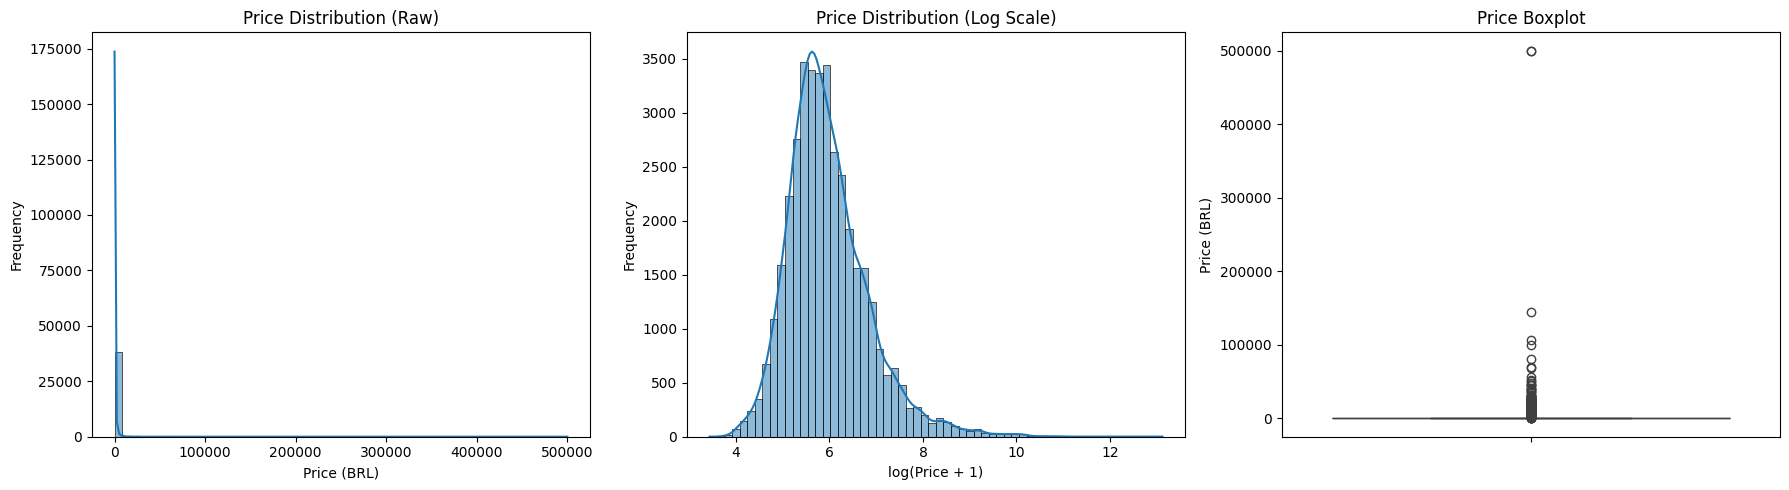

Price Statistics:
25th percentile (Q1): R$ 220.00
75th percentile (Q3): R$ 600.00
IQR: R$ 380.00
Potential outliers (> Q3 + 1.5*IQR): R$ > 1170.00


In [19]:
# 1. PRICE DISTRIBUTION ANALYSIS
print("=== 1. PRICE DISTRIBUTION ===")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Raw price distribution
sns.histplot(df_eda['price'], bins=60, kde=True, ax=axes[0])
axes[0].set_title('Price Distribution (Raw)')
axes[0].set_xlabel('Price (BRL)')
axes[0].set_ylabel('Frequency')

# Log price distribution
sns.histplot(df_eda['log_price'], bins=60, kde=True, ax=axes[1])
axes[1].set_title('Price Distribution (Log Scale)')
axes[1].set_xlabel('log(Price + 1)')
axes[1].set_ylabel('Frequency')

# Boxplot of price
sns.boxplot(y=df_eda['price'], ax=axes[2])
axes[2].set_title('Price Boxplot')
axes[2].set_ylabel('Price (BRL)')

plt.tight_layout()
plt.show()

# Price statistics
Q1 = df_eda['price'].quantile(0.25)
Q3 = df_eda['price'].quantile(0.75)
IQR = Q3 - Q1
print(f"Price Statistics:")
print(f"25th percentile (Q1): R$ {Q1:.2f}")
print(f"75th percentile (Q3): R$ {Q3:.2f}")
print(f"IQR: R$ {IQR:.2f}")
print(f"Potential outliers (> Q3 + 1.5*IQR): R$ > {Q3 + 1.5*IQR:.2f}")

=== 2. GEOGRAPHICAL ANALYSIS ===


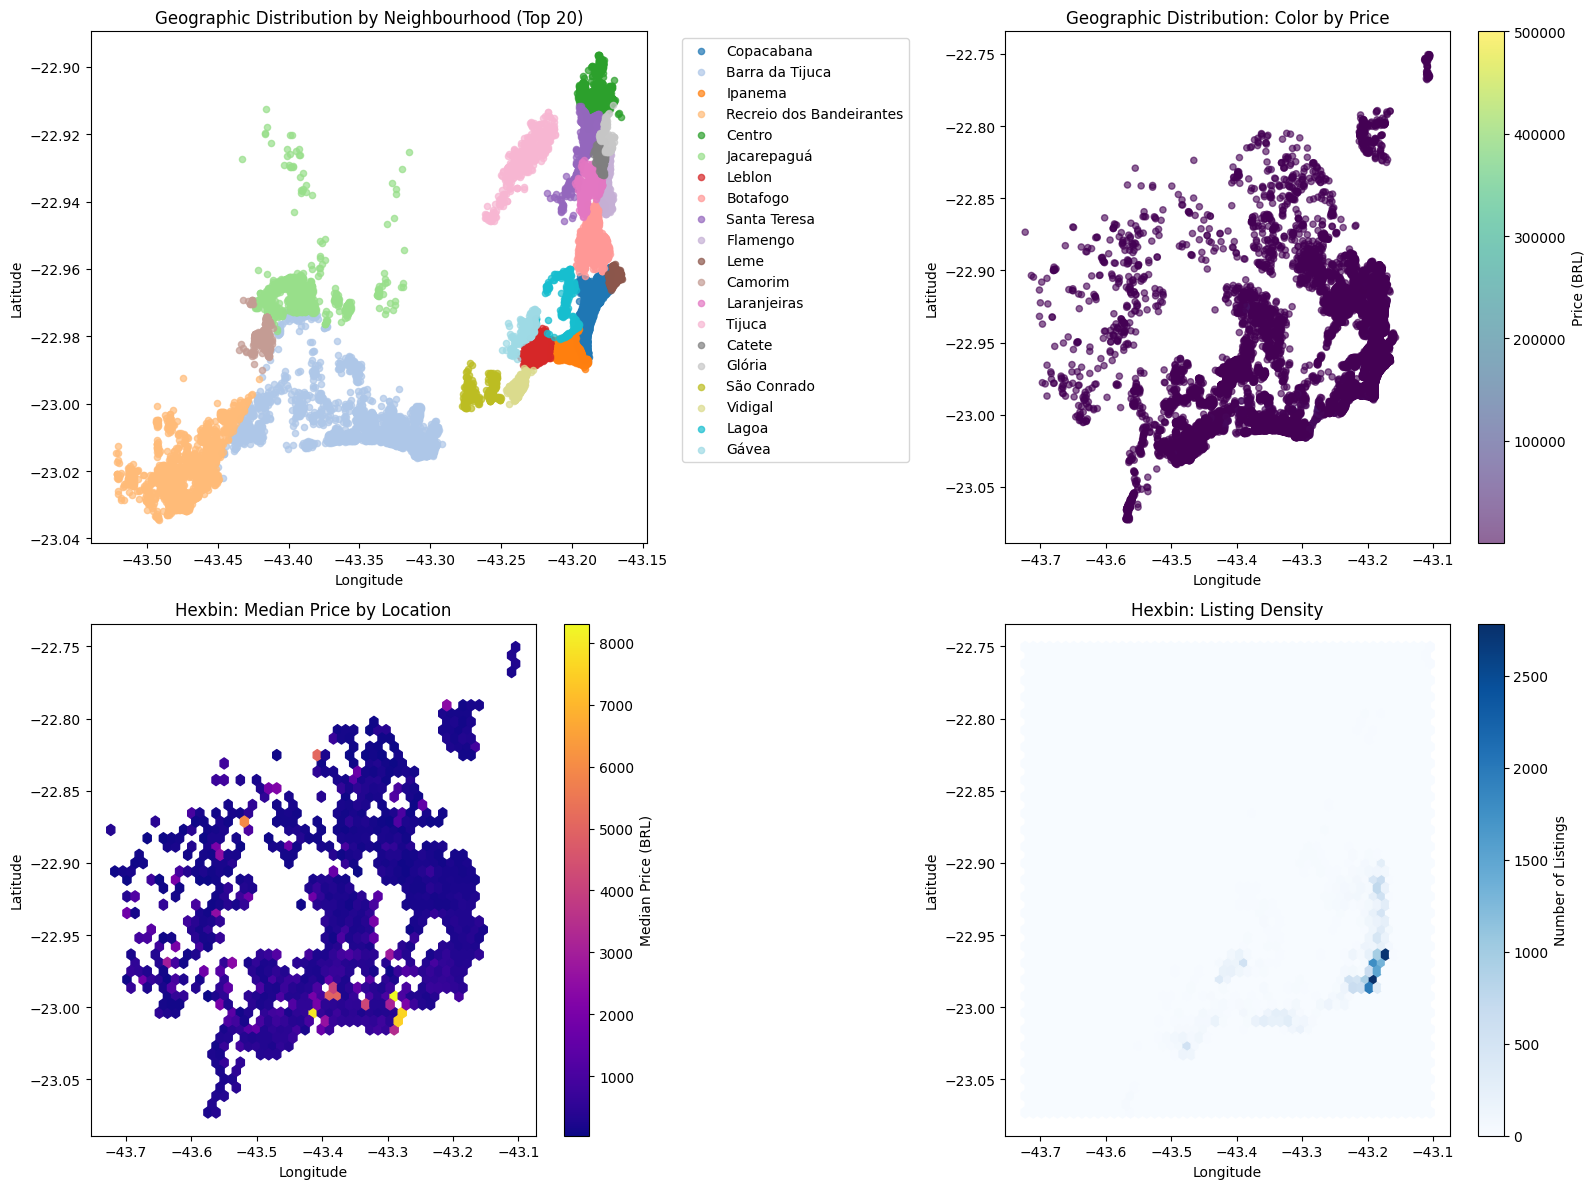

In [ ]:
# 2. GEOGRAPHICAL ANALYSIS WITH NEIGHBOURHOOD_CLEANSED
print("=== 2. GEOGRAPHICAL ANALYSIS ===")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Scatter plot: Geographic distribution colored by neighbourhood
neighborhoods = df_eda['neighbourhood_cleansed'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, min(len(neighborhoods), 20)))

# Plot 1: Color by neighbourhood (top 20 only for clarity)
top_neighborhoods = df_eda['neighbourhood_cleansed'].value_counts().head(20).index
df_top = df_eda[df_eda['neighbourhood_cleansed'].isin(top_neighborhoods)]

for i, neighborhood in enumerate(top_neighborhoods):
    neighborhood_data = df_top[df_top['neighbourhood_cleansed'] == neighborhood]
    axes[0,0].scatter(neighborhood_data['longitude'], neighborhood_data['latitude'],
                     c=[colors[i]], label=neighborhood, s=20, alpha=0.7)

axes[0,0].set_title('Geographic Distribution by Neighbourhood (Top 20)')
axes[0,0].set_xlabel('Longitude')
axes[0,0].set_ylabel('Latitude')
axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Scatter plot: Geographic distribution colored by price
scatter = axes[0,1].scatter(df_eda['longitude'], df_eda['latitude'],
                           c=df_eda['price'], cmap='viridis',
                           s=20, alpha=0.6)
plt.colorbar(scatter, ax=axes[0,1], label='Price (BRL)')
axes[0,1].set_title('Geographic Distribution: Color by Price')
axes[0,1].set_xlabel('Longitude')
axes[0,1].set_ylabel('Latitude')

# Hexbin plot: Price density
hb = axes[1,0].hexbin(df_eda['longitude'], df_eda['latitude'],
                     C=df_eda['price'], gridsize=50,
                     reduce_C_function=np.median, cmap='plasma')
plt.colorbar(hb, ax=axes[1,0], label='Median Price (BRL)')
axes[1,0].set_title('Hexbin: Median Price by Location')
axes[1,0].set_xlabel('Longitude')
axes[1,0].set_ylabel('Latitude')

# Hexbin plot: Listing density by neighbourhood
hb = axes[1,1].hexbin(df_eda['longitude'], df_eda['latitude'],
                     gridsize=50, cmap='Blues')
plt.colorbar(hb, ax=axes[1,1], label='Number of Listings')
axes[1,1].set_title('Hexbin: Listing Density')
axes[1,1].set_xlabel('Longitude')
axes[1,1].set_ylabel('Latitude')

plt.tight_layout()
plt.show()

=== 3. NEIGHBOURHOOD_CLEANSED ANALYSIS ===


/tmp/ipython-input-1864821238.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=neighbourhood_counts.index, x=neighbourhood_counts.values, ax=axes[0,0], palette='viridis')
/tmp/ipython-input-1864821238.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=neighbourhood_prices.index, x=neighbourhood_prices.values, ax=axes[0,1], palette='plasma')


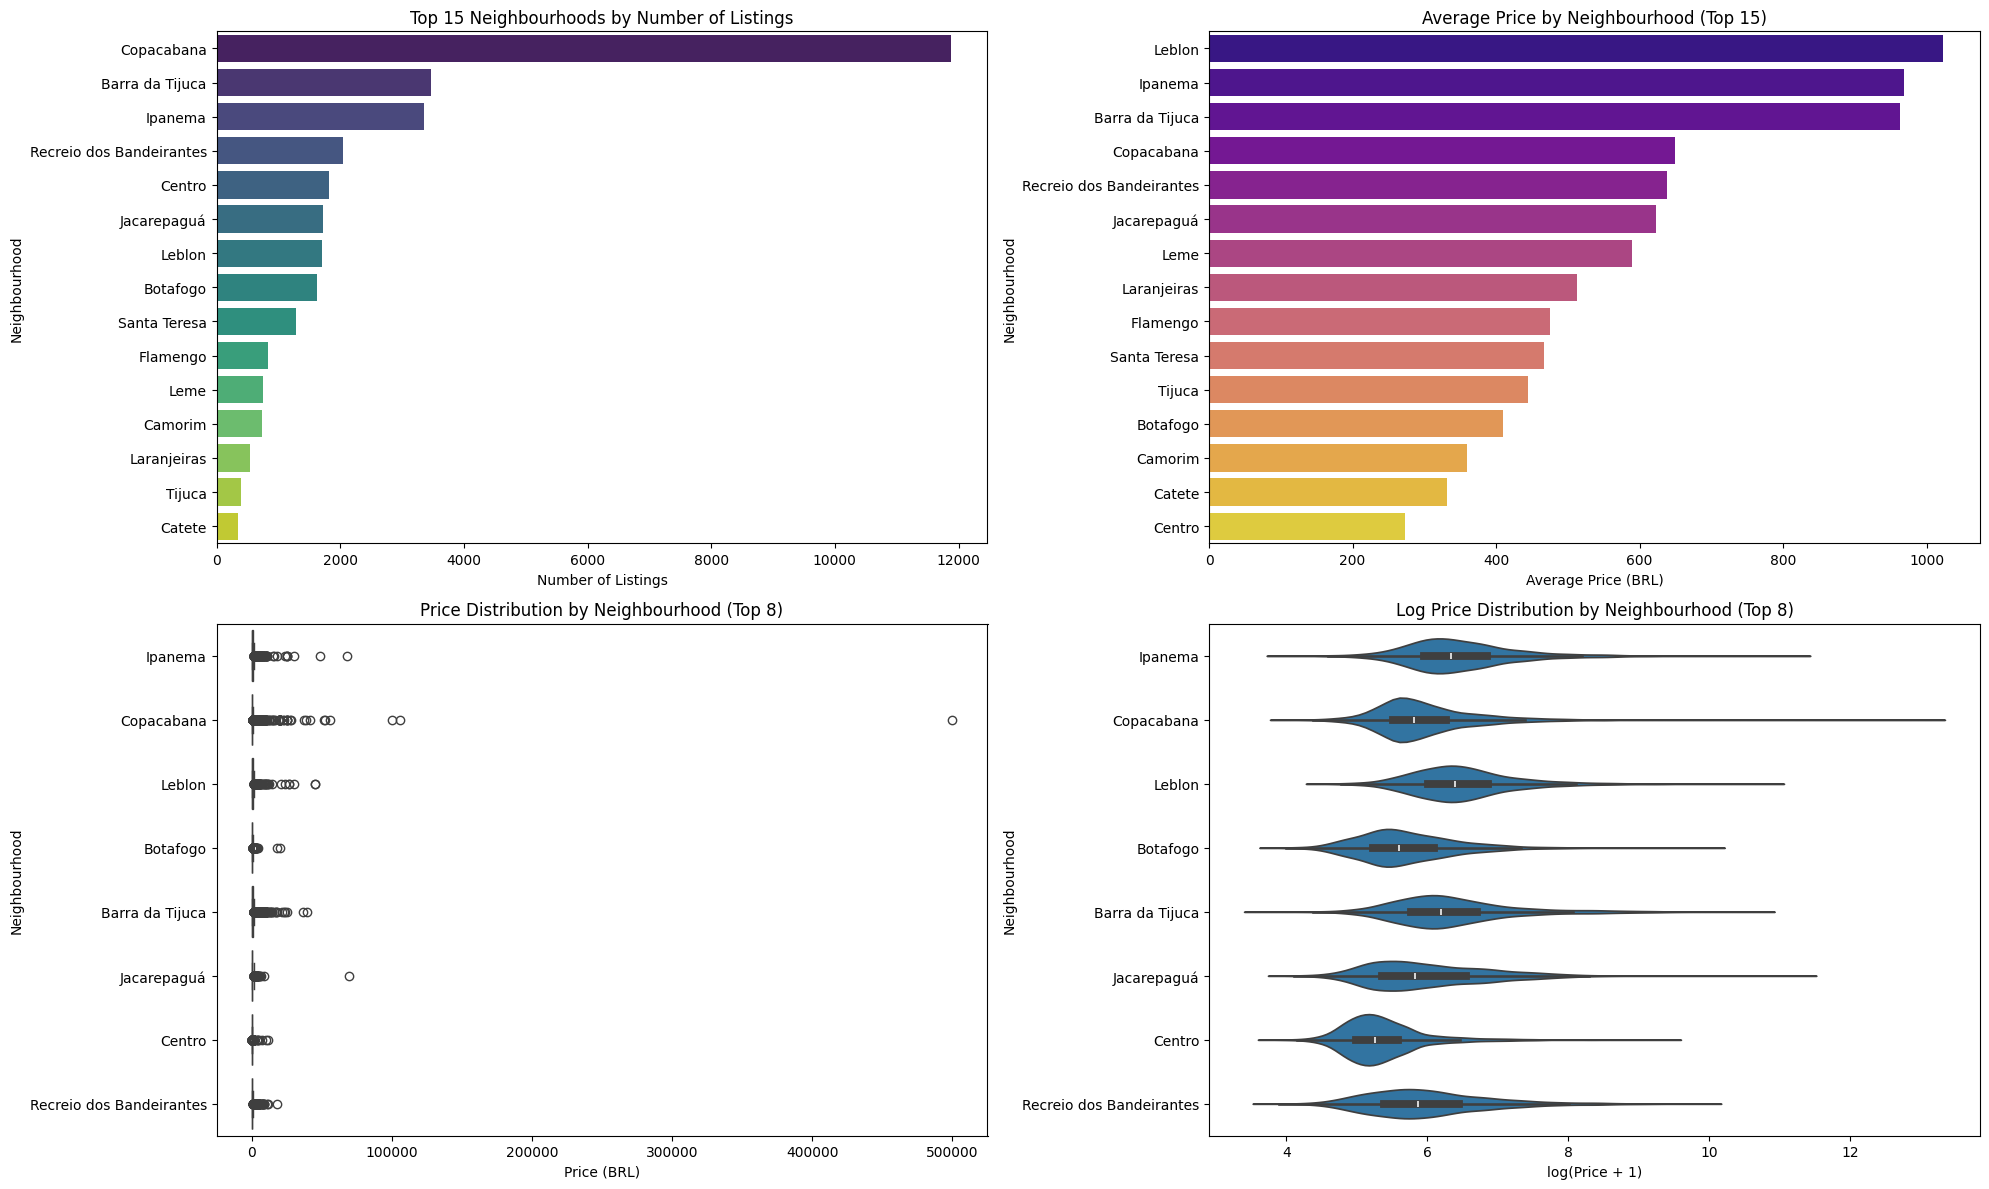


Neighbourhood Price Statistics (Top 10 by average price):
                        count         mean  median           std    min  \
neighbourhood_cleansed                                                    
Estácio                    78  6658.012821   160.0  56585.882596   51.0   
Joá                       140  6653.385714  5450.0   6187.710756  124.0   
São Conrado               313  3001.750799   855.0   5857.126824  110.0   
Anchieta                    2  2665.000000  2665.0   3440.781597  232.0   
Itanhangá                 162  2657.586420   356.0  11710.528771   72.0   
Coelho Neto                 5  2635.600000    90.0   4947.885892   62.0   
Santíssimo                 10  1454.300000   187.0   3512.128891  109.0   
Curicica                   72  1424.361111   219.5   9543.081135   61.0   
Galeão                      2  1316.000000  1316.0   1497.652163  257.0   
Lagoa                     261  1278.321839   589.0   3094.226756  107.0   

                             max  
neigh

In [20]:
# 3. NEIGHBOURHOOD_CLEANSED ANALYSIS
print("=== 3. NEIGHBOURHOOD_CLEANSED ANALYSIS ===")

# Top 15 neighbourhoods by number of listings
top_15_neighbourhoods = df_eda['neighbourhood_cleansed'].value_counts().head(15).index
df_top_15 = df_eda[df_eda['neighbourhood_cleansed'].isin(top_15_neighbourhoods)]

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Number of listings per neighbourhood
neighbourhood_counts = df_eda['neighbourhood_cleansed'].value_counts().head(15)
sns.barplot(y=neighbourhood_counts.index, x=neighbourhood_counts.values, ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Top 15 Neighbourhoods by Number of Listings')
axes[0,0].set_xlabel('Number of Listings')
axes[0,0].set_ylabel('Neighbourhood')

# Average price per neighbourhood (top 15)
neighbourhood_prices = df_top_15.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)
sns.barplot(y=neighbourhood_prices.index, x=neighbourhood_prices.values, ax=axes[0,1], palette='plasma')
axes[0,1].set_title('Average Price by Neighbourhood (Top 15)')
axes[0,1].set_xlabel('Average Price (BRL)')
axes[0,1].set_ylabel('Neighbourhood')

# Price distribution by neighbourhood (boxplot for top 8)
top_8_neighbourhoods = top_15_neighbourhoods[:8]
df_top_8 = df_eda[df_eda['neighbourhood_cleansed'].isin(top_8_neighbourhoods)]
sns.boxplot(data=df_top_8, y='neighbourhood_cleansed', x='price', ax=axes[1,0])
axes[1,0].set_title('Price Distribution by Neighbourhood (Top 8)')
axes[1,0].set_xlabel('Price (BRL)')
axes[1,0].set_ylabel('Neighbourhood')

# Log price distribution by neighbourhood (violin plot for top 8)
sns.violinplot(data=df_top_8, y='neighbourhood_cleansed', x='log_price', ax=axes[1,1])
axes[1,1].set_title('Log Price Distribution by Neighbourhood (Top 8)')
axes[1,1].set_xlabel('log(Price + 1)')
axes[1,1].set_ylabel('Neighbourhood')

plt.tight_layout()
plt.show()

# Neighbourhood statistics
print("\nNeighbourhood Price Statistics (Top 10 by average price):")
neighbourhood_stats = df_eda.groupby('neighbourhood_cleansed')['price'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).sort_values('mean', ascending=False)
print(neighbourhood_stats.head(10))

=== 4. DISTANCE FROM CRISTO REDENTOR ===


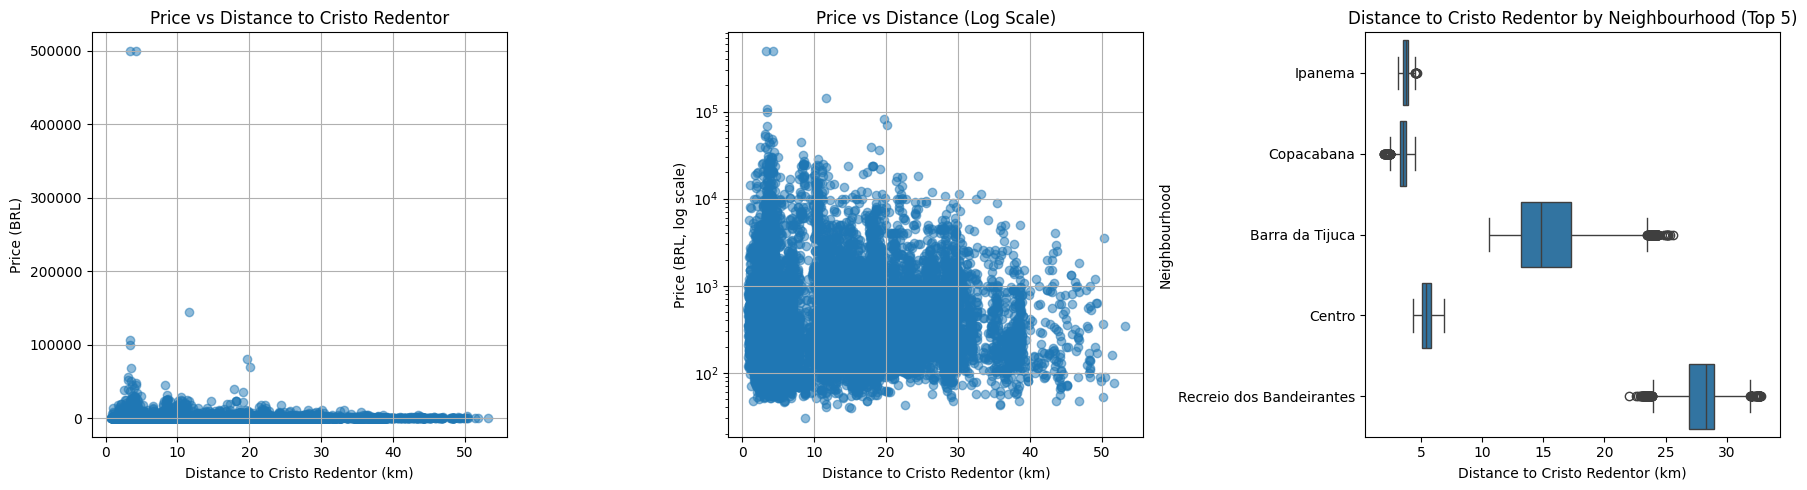

Distance to Cristo Redentor Statistics:
Min distance: 0.73 km
Max distance: 53.21 km
Mean distance: 8.44 km

Correlation between distance and price by neighbourhood (Top 10):
Copacabana                | Correlation: 0.004 | Listings: 11875
Barra da Tijuca           | Correlation: 0.086 | Listings: 3473
Ipanema                   | Correlation: 0.026 | Listings: 3361
Recreio dos Bandeirantes  | Correlation: -0.051 | Listings: 2045
Centro                    | Correlation: 0.009 | Listings: 1823
Jacarepaguá               | Correlation: -0.038 | Listings: 1721
Leblon                    | Correlation: 0.111 | Listings: 1707
Botafogo                  | Correlation: 0.010 | Listings: 1627
Santa Teresa              | Correlation: -0.096 | Listings: 1285
Flamengo                  | Correlation: 0.013 | Listings: 833


In [21]:
# 4. DISTANCE FROM LANDMARK ANALYSIS (Cristo Redentor)
print("=== 4. DISTANCE FROM CRISTO REDENTOR ===")

def haversine_km(lat1, lon1, lat2, lon2):
    """Calculate distance between two points using Haversine formula"""
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    R = 6371.0  # Earth radius in km
    return R * c

# Cristo Redentor coordinates
cristo_lat, cristo_lon = -22.9519, -43.2105
df_eda['dist_to_cristo_km'] = df_eda.apply(
    lambda r: haversine_km(cristo_lat, cristo_lon, r['latitude'], r['longitude']),
    axis=1
)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot: Distance vs Price
axes[0].scatter(df_eda['dist_to_cristo_km'], df_eda['price'], alpha=0.5)
axes[0].set_xlabel('Distance to Cristo Redentor (km)')
axes[0].set_ylabel('Price (BRL)')
axes[0].set_title('Price vs Distance to Cristo Redentor')
axes[0].grid(True)

# Log scale version
axes[1].scatter(df_eda['dist_to_cristo_km'], df_eda['price'], alpha=0.5)
axes[1].set_yscale('log')
axes[1].set_xlabel('Distance to Cristo Redentor (km)')
axes[1].set_ylabel('Price (BRL, log scale)')
axes[1].set_title('Price vs Distance (Log Scale)')
axes[1].grid(True)

# Distance distribution by top neighbourhoods
top_5_neighbourhoods = top_15_neighbourhoods[:5]
df_top_5_dist = df_eda[df_eda['neighbourhood_cleansed'].isin(top_5_neighbourhoods)]
sns.boxplot(data=df_top_5_dist, x='dist_to_cristo_km', y='neighbourhood_cleansed', ax=axes[2])
axes[2].set_title('Distance to Cristo Redentor by Neighbourhood (Top 5)')
axes[2].set_xlabel('Distance to Cristo Redentor (km)')
axes[2].set_ylabel('Neighbourhood')

plt.tight_layout()
plt.show()

# Distance statistics
print("Distance to Cristo Redentor Statistics:")
print(f"Min distance: {df_eda['dist_to_cristo_km'].min():.2f} km")
print(f"Max distance: {df_eda['dist_to_cristo_km'].max():.2f} km")
print(f"Mean distance: {df_eda['dist_to_cristo_km'].mean():.2f} km")

# Correlation between distance and price by neighbourhood
print("\nCorrelation between distance and price by neighbourhood (Top 10):")
top_10_neighbourhoods = df_eda['neighbourhood_cleansed'].value_counts().head(10).index
for neighbourhood in top_10_neighbourhoods:
    neigh_data = df_eda[df_eda['neighbourhood_cleansed'] == neighbourhood]
    if len(neigh_data) > 10:  # Only calculate if enough data points
        corr = neigh_data['dist_to_cristo_km'].corr(neigh_data['price'])
        print(f"{neighbourhood:25} | Correlation: {corr:.3f} | Listings: {len(neigh_data)}")

=== 5. PROPERTY CHARACTERISTICS ANALYSIS ===


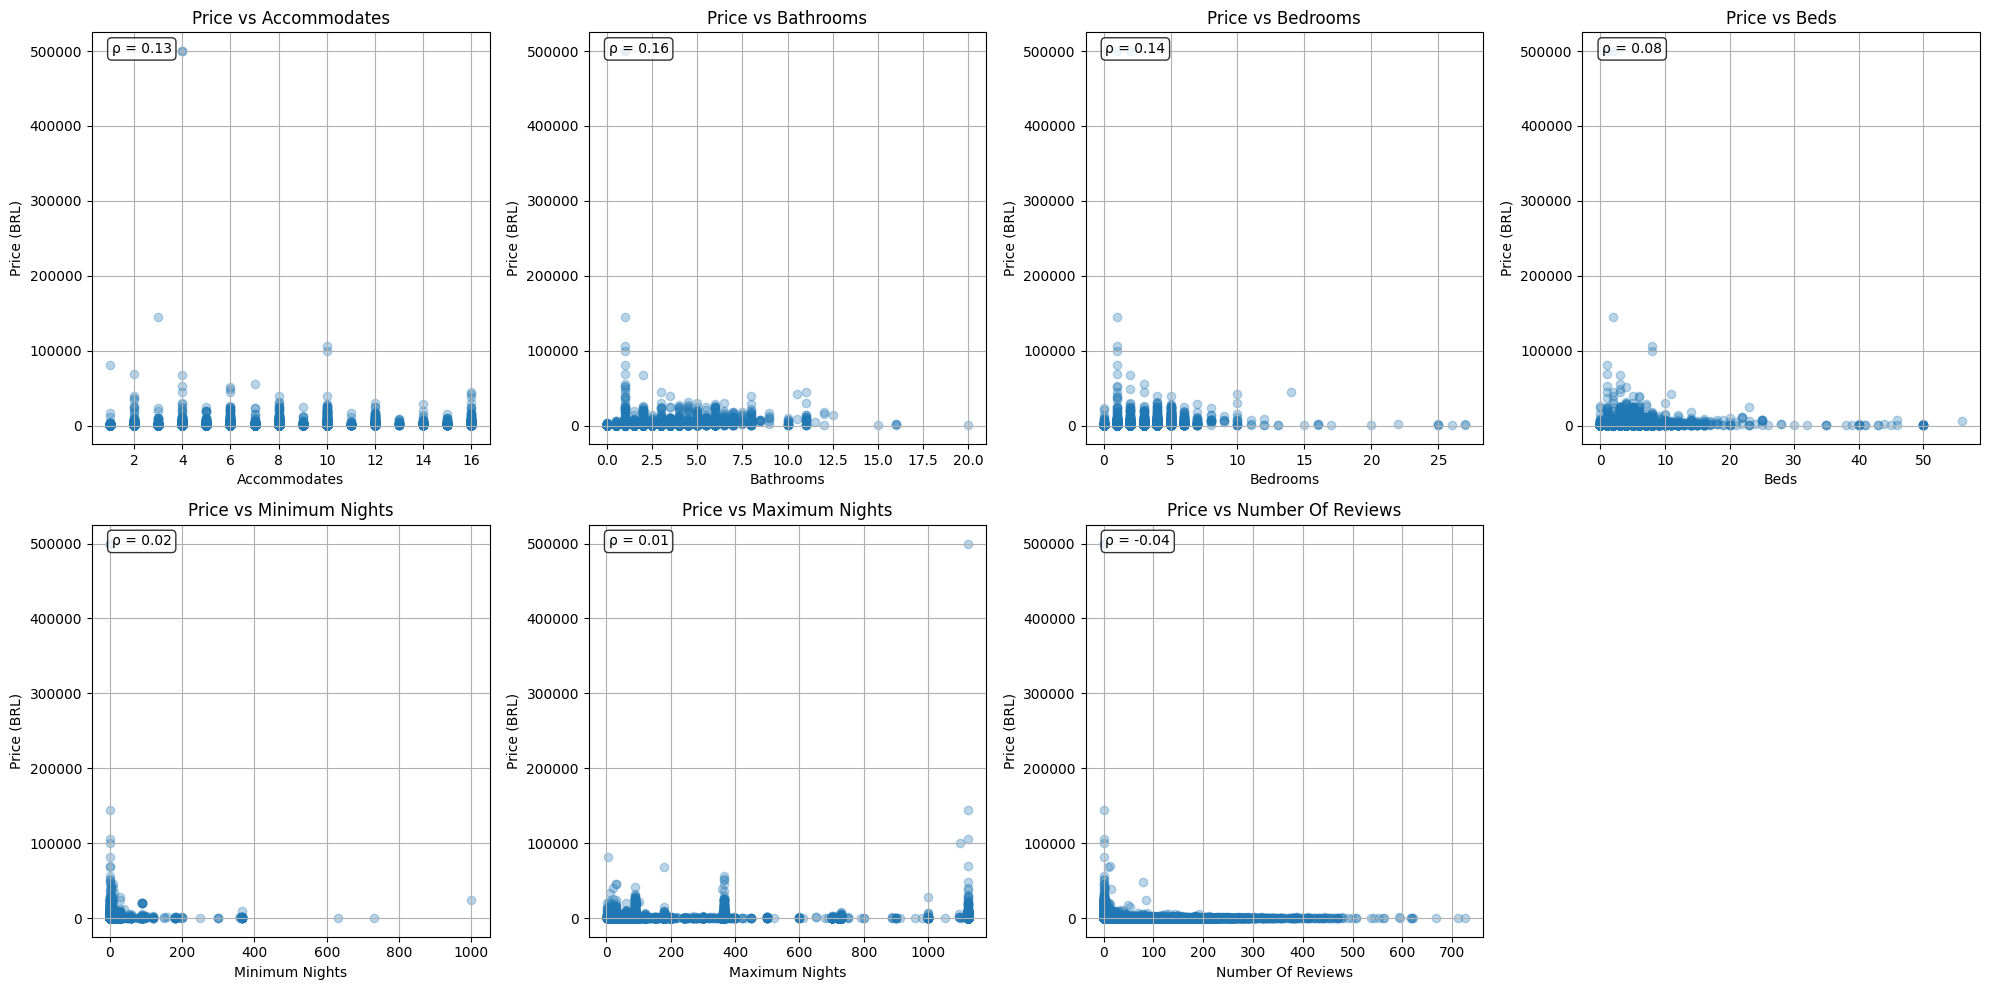

In [22]:
# 5. PROPERTY CHARACTERISTICS ANALYSIS
print("=== 5. PROPERTY CHARACTERISTICS ANALYSIS ===")

# Select numeric features for analysis
numeric_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds',
                   'minimum_nights', 'maximum_nights', 'number_of_reviews']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(numeric_features):
    if i < len(axes):
        # Scatter plot with log price
        axes[i].scatter(df_eda[feature], df_eda['price'], alpha=0.3)
        axes[i].set_xlabel(feature.replace('_', ' ').title())
        axes[i].set_ylabel('Price (BRL)')
        axes[i].set_title(f'Price vs {feature.replace("_", " ").title()}')
        axes[i].grid(True)

        # Add correlation coefficient
        corr = df_eda[feature].corr(df_eda['price'])
        axes[i].text(0.05, 0.95, f'ρ = {corr:.2f}', transform=axes[i].transAxes,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Hide unused subplots
for i in range(len(numeric_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

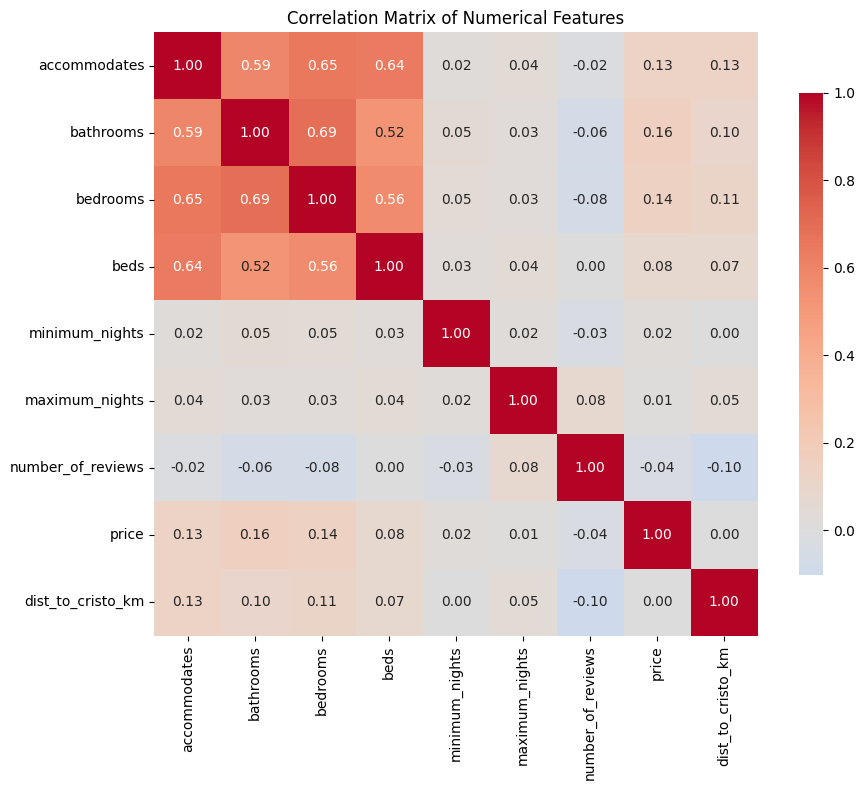

In [23]:
# Correlation matrix
correlation_matrix = df_eda[numeric_features + ['price', 'dist_to_cristo_km']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

=== 6. ROOM TYPE AND NEIGHBOURHOOD INTERACTION ===


/tmp/ipython-input-1841778870.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_counts.values, y=room_type_counts.index, ax=axes[0,0], palette='Set2')
/tmp/ipython-input-1841778870.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_prices.values, y=room_type_prices.index, ax=axes[0,1], palette='Set3')


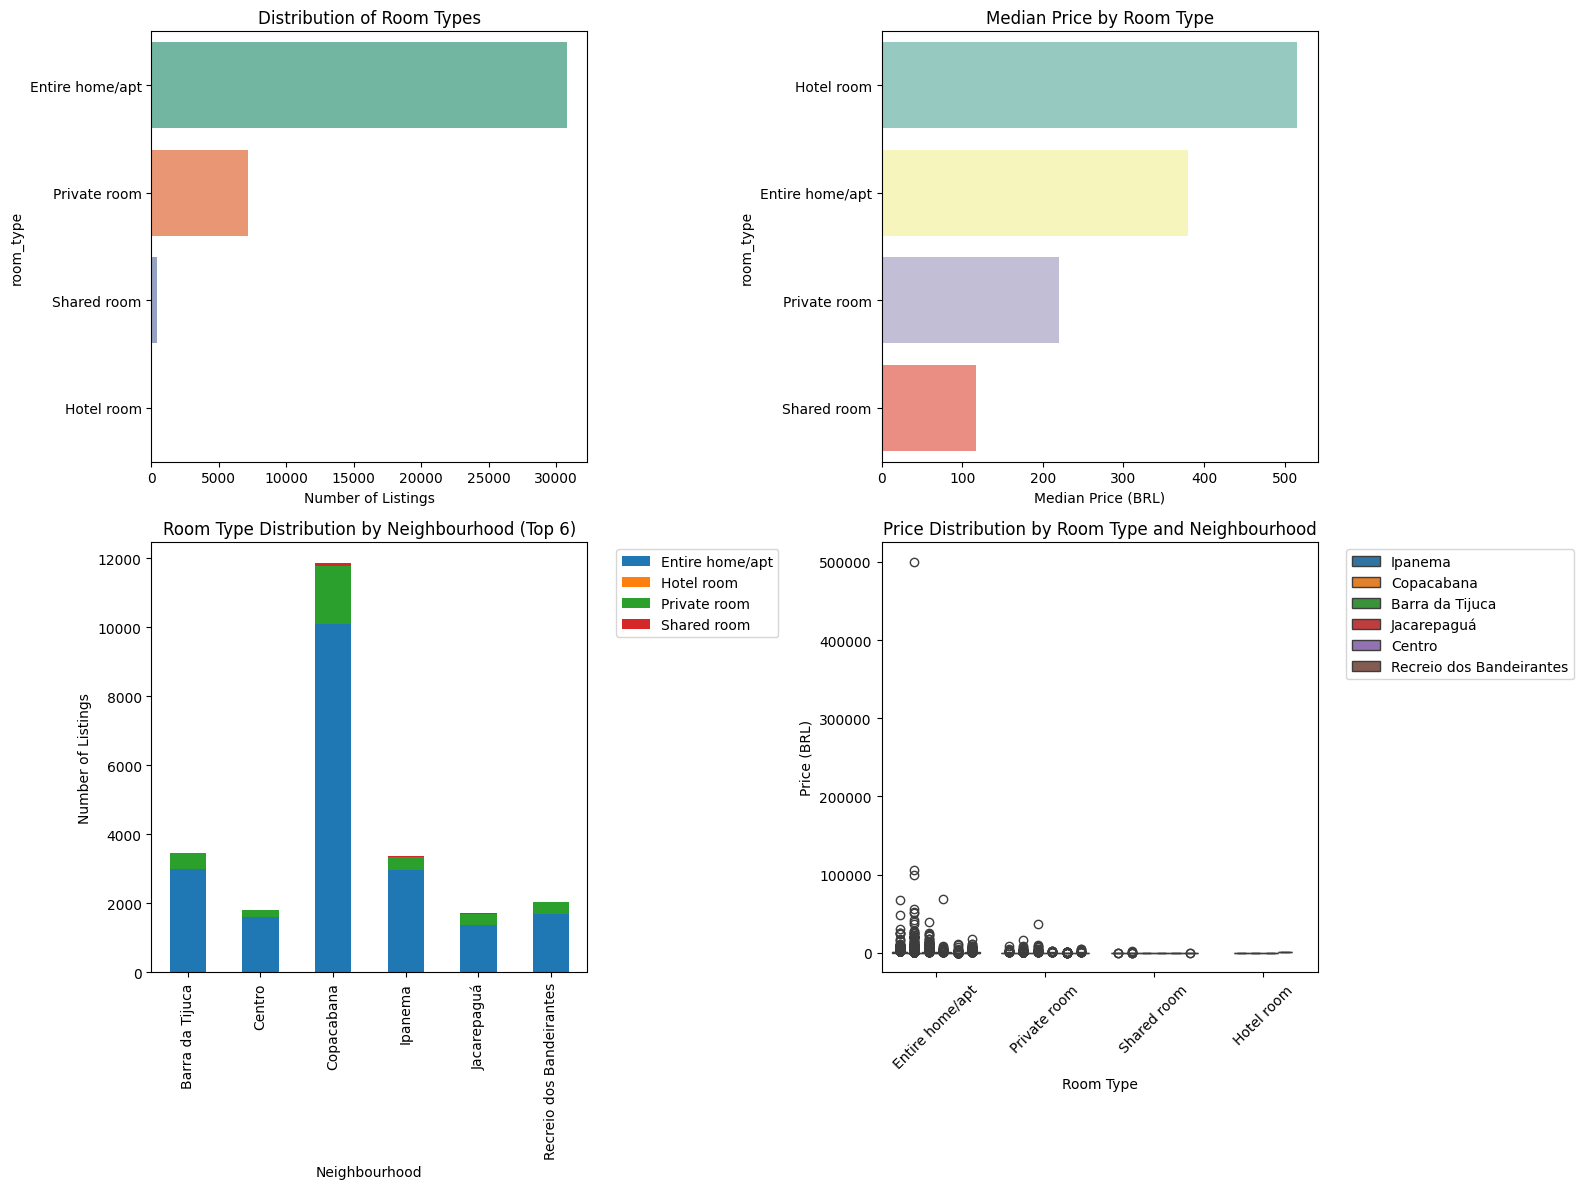

Room Type Statistics:
                 count        mean  median          std
room_type                                              
Entire home/apt  30787  806.667262   380.0  4531.818057
Hotel room          15  584.200000   515.0   397.479595
Private room      7166  377.172900   220.0  2092.110110
Shared room        388  208.237113   117.0  1258.819239


In [24]:
# 6. ROOM TYPE ANALYSIS WITH NEIGHBOURHOOD CONTEXT
print("=== 6. ROOM TYPE AND NEIGHBOURHOOD INTERACTION ===")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Room type distribution
room_type_counts = df_eda['room_type'].value_counts()
sns.barplot(x=room_type_counts.values, y=room_type_counts.index, ax=axes[0,0], palette='Set2')
axes[0,0].set_title('Distribution of Room Types')
axes[0,0].set_xlabel('Number of Listings')

# Room type prices
room_type_prices = df_eda.groupby('room_type')['price'].median().sort_values(ascending=False)
sns.barplot(x=room_type_prices.values, y=room_type_prices.index, ax=axes[0,1], palette='Set3')
axes[0,1].set_title('Median Price by Room Type')
axes[0,1].set_xlabel('Median Price (BRL)')

# Room type distribution by top neighbourhoods
top_6_neighbourhoods = top_15_neighbourhoods[:6]
df_top_6 = df_eda[df_eda['neighbourhood_cleansed'].isin(top_6_neighbourhoods)]
room_type_by_neighbourhood = pd.crosstab(df_top_6['neighbourhood_cleansed'], df_top_6['room_type'])
room_type_by_neighbourhood.plot(kind='bar', stacked=True, ax=axes[1,0])
axes[1,0].set_title('Room Type Distribution by Neighbourhood (Top 6)')
axes[1,0].set_xlabel('Neighbourhood')
axes[1,0].set_ylabel('Number of Listings')
axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Average price by room type and neighbourhood
sns.boxplot(data=df_top_6, x='room_type', y='price', hue='neighbourhood_cleansed', ax=axes[1,1])
axes[1,1].set_title('Price Distribution by Room Type and Neighbourhood')
axes[1,1].set_xlabel('Room Type')
axes[1,1].set_ylabel('Price (BRL)')
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Room type statistics
print("Room Type Statistics:")
room_type_stats = df_eda.groupby('room_type')['price'].agg(['count', 'mean', 'median', 'std'])
print(room_type_stats)

=== 7. FEATURE INTERACTIONS ===


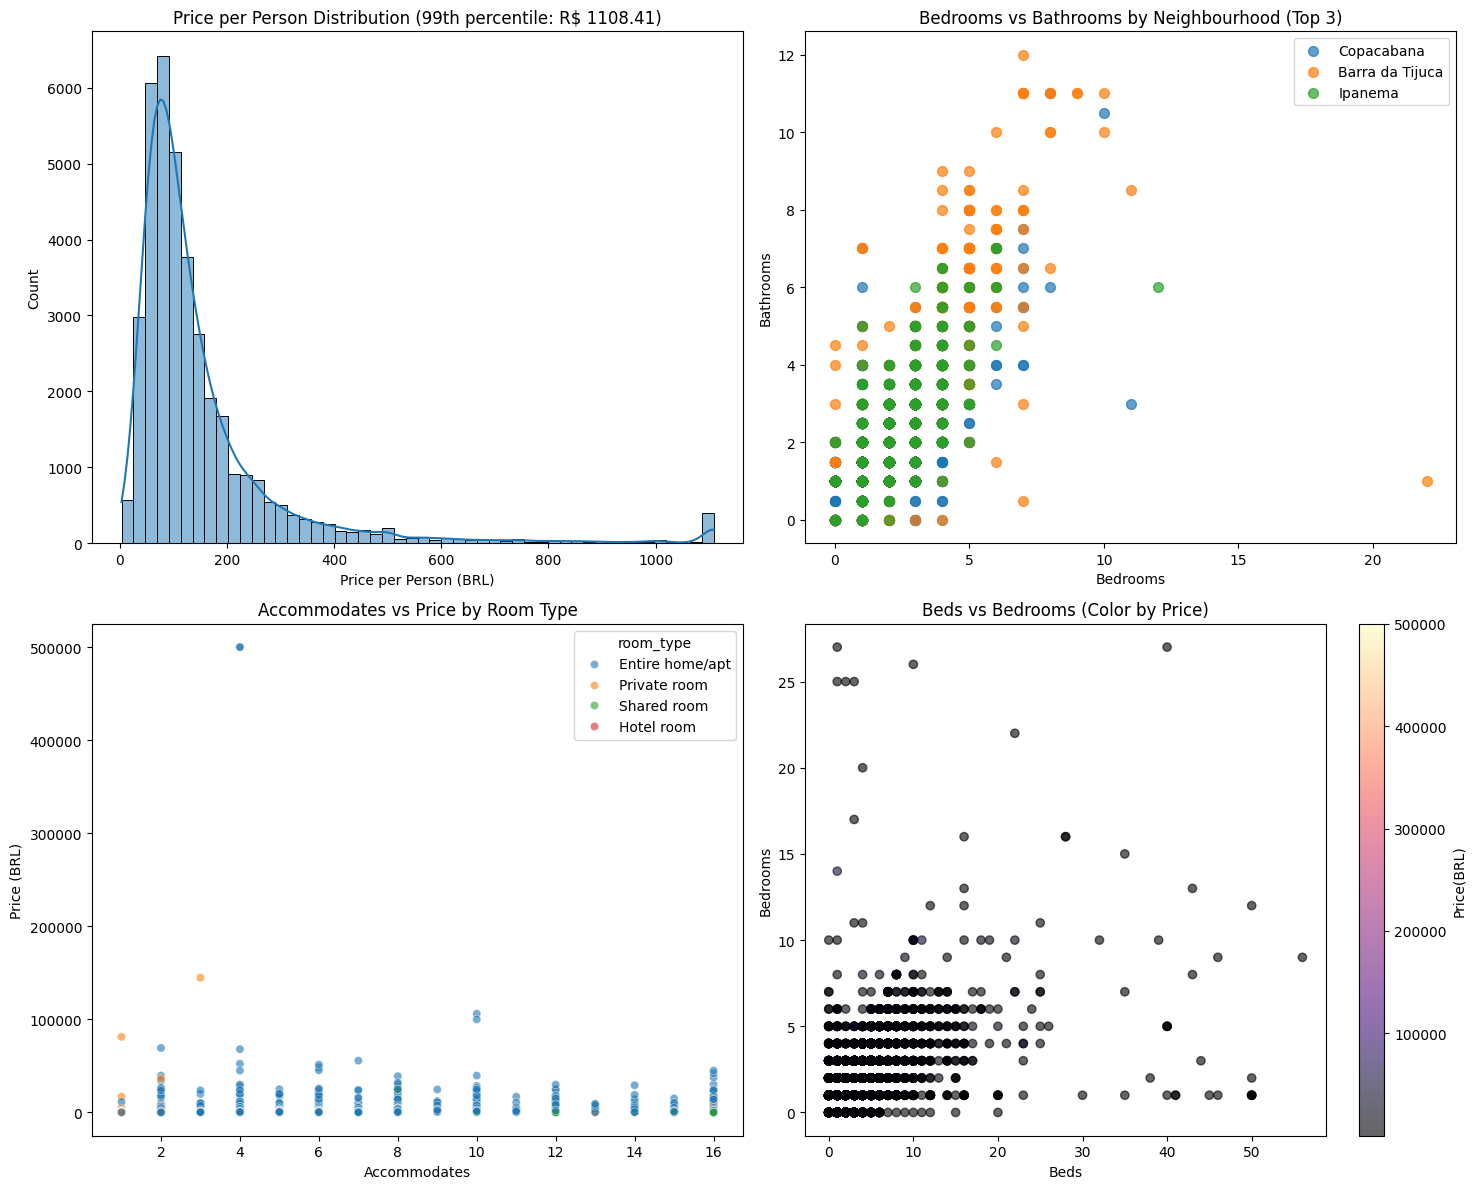

In [25]:
# 7. FEATURE INTERACTIONS AND COMBINATIONS
print("=== 7. FEATURE INTERACTIONS ===")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Price per person analysis
price_per_person_99th = df_eda['price_per_person'].quantile(0.99)
df_eda['price_per_person_clipped'] = df_eda['price_per_person'].clip(upper=price_per_person_99th)

sns.histplot(df_eda['price_per_person_clipped'], bins=50, kde=True, ax=axes[0,0])
axes[0,0].set_title(f'Price per Person Distribution (99th percentile: R$ {price_per_person_99th:.2f})')
axes[0,0].set_xlabel('Price per Person (BRL)')

# Bedrooms vs Bathrooms colored by neighbourhood
top_3_neighbourhoods = top_15_neighbourhoods[:3]
df_top_3 = df_eda[df_eda['neighbourhood_cleansed'].isin(top_3_neighbourhoods)]

for i, neighbourhood in enumerate(top_3_neighbourhoods):
    neighbourhood_data = df_top_3[df_top_3['neighbourhood_cleansed'] == neighbourhood]
    axes[0,1].scatter(neighbourhood_data['bedrooms'], neighbourhood_data['bathrooms'],
                     label=neighbourhood, alpha=0.7, s=50)
axes[0,1].set_title('Bedrooms vs Bathrooms by Neighbourhood (Top 3)')
axes[0,1].set_xlabel('Bedrooms')
axes[0,1].set_ylabel('Bathrooms')
axes[0,1].legend()

# Accommodates vs Price by room type
sns.scatterplot(data=df_eda, x='accommodates', y='price', hue='room_type',
                alpha=0.6, ax=axes[1,0])
axes[1,0].set_title('Accommodates vs Price by Room Type')
axes[1,0].set_xlabel('Accommodates')
axes[1,0].set_ylabel('Price (BRL)')

# Beds vs Bedrooms colored by price
scatter = axes[1,1].scatter(df_eda['beds'], df_eda['bedrooms'],
                           c=df_eda['price'], cmap='magma', alpha=0.6)
plt.colorbar(scatter, ax=axes[1,1], label='Price(BRL)')
axes[1,1].set_title('Beds vs Bedrooms (Color by Price)')
axes[1,1].set_xlabel('Beds')
axes[1,1].set_ylabel('Bedrooms')

plt.tight_layout()
plt.show()

In [26]:
# 8. KEY INSIGHTS AND FEATURE IMPORTANCE SUMMARY
print("=== 8. KEY INSIGHTS SUMMARY ===")

# Calculate correlation with price
feature_correlations = {}
for feature in numeric_features + ['dist_to_cristo_km']:
    if feature in df_eda.columns:
        corr = df_eda[feature].corr(df_eda['price'])
        feature_correlations[feature] = corr

# Sort by absolute correlation
sorted_correlations = sorted(feature_correlations.items(), key=lambda x: abs(x[1]), reverse=True)

print("Feature correlations with price (absolute value):")
print("=" * 60)
for feature, corr in sorted_correlations:
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    direction = "Positive" if corr > 0 else "Negative"
    print(f"{feature:25} | Correlation: {corr:7.3f} | {strength:8} {direction}")

# Categorical feature impact
print("\nCategorical Feature Impact:")
print("=" * 60)

# Room type impact
room_type_impact = df_eda.groupby('room_type')['price'].median().sort_values(ascending=False)
print("\nRoom type impact on price (median):")
for room_type, median_price in room_type_impact.items():
    print(f"{room_type:20} | Median Price: R$ {median_price:.2f}")

# Neighbourhood impact (top 10)
neighbourhood_impact = df_eda.groupby('neighbourhood_cleansed')['price'].median().sort_values(ascending=False).head(10)
print("\nNeighbourhood impact on price (median, top 10):")
for neighbourhood, median_price in neighbourhood_impact.items():
    print(f"{neighbourhood:25} | Median Price: R$ {median_price:.2f}")

# Geographic insights
print(f"\nGeographic insights:")
print(f"Average distance to Cristo Redentor: {df_eda['dist_to_cristo_km'].mean():.2f} km")
print(f"Overall correlation between distance and price: {df_eda['dist_to_cristo_km'].corr(df_eda['price']):.3f}")

# Property size insights
print(f"\nProperty size insights:")
print(f"Average bedrooms: {df_eda['bedrooms'].mean():.1f}")
print(f"Average bathrooms: {df_eda['bathrooms'].mean():.1f}")
print(f"Average accommodates: {df_eda['accommodates'].mean():.1f}")
print(f"Average price per person: R$ {df_eda['price_per_person'].mean():.2f}")

# Data quality summary
print(f"\nData Quality Summary:")
print(f"Total listings after cleaning: {len(df_eda)}")
print(f"Number of neighbourhoods: {df_eda['neighbourhood_cleansed'].nunique()}")
print(f"Number of room types: {df_eda['room_type'].nunique()}")

=== 8. KEY INSIGHTS SUMMARY ===
Feature correlations with price (absolute value):
bathrooms                 | Correlation:   0.157 | Weak     Positive
bedrooms                  | Correlation:   0.137 | Weak     Positive
accommodates              | Correlation:   0.131 | Weak     Positive
beds                      | Correlation:   0.077 | Weak     Positive
number_of_reviews         | Correlation:  -0.038 | Weak     Negative
minimum_nights            | Correlation:   0.022 | Weak     Positive
maximum_nights            | Correlation:   0.009 | Weak     Positive
dist_to_cristo_km         | Correlation:   0.001 | Weak     Positive

Categorical Feature Impact:

Room type impact on price (median):
Hotel room           | Median Price: R$ 515.00
Entire home/apt      | Median Price: R$ 380.00
Private room         | Median Price: R$ 220.00
Shared room          | Median Price: R$ 117.00

Neighbourhood impact on price (median, top 10):
Joá                       | Median Price: R$ 5450.00
Anchieta  

## Robust IQR-based outlier filtering


In [33]:
def _iqr_bounds(series: pd.Series, k: float = 1.5):
    """
    Compute lower/upper bounds for outlier detection using the IQR rule.

    Parameters
    ----------
    series : pd.Series
        Numeric series (non-numeric should be filtered before).
    k : float, default 1.5
        Whisker length multiplier (1.5 = Tukey; 3.0 = more tolerant).

    Returns
    -------
    low : float
        Lower bound (Q1 - k * IQR).
    up : float
        Upper bound (Q3 + k * IQR).
    stats : dict
        Dict with Q1, Q3, IQR.
    """
    if not pd.api.types.is_numeric_dtype(series):
        raise TypeError("Series must be numeric to compute IQR bounds.")

    if series.empty:
        raise ValueError("Series is empty; cannot compute IQR bounds.")

    # Remove NaN values for calculation
    series_clean = series.dropna()

    if len(series_clean) < 4:  # Need at least 4 values for meaningful quartiles
        raise ValueError(f"Need at least 4 non-NaN values, got {len(series_clean)}")

    q1 = series_clean.quantile(0.25)
    q3 = series_clean.quantile(0.75)
    iqr = q3 - q1

    # Handle case where IQR is 0 (constant values)
    if iqr == 0:
        # Use standard deviation-based bounds for constant values
        std = series_clean.std()
        if std == 0:  # All values are identical
            low = q1 - k * 1.0  # Use arbitrary small range
            up = q3 + k * 1.0
        else:
            low = q1 - k * std
            up = q3 + k * std
    else:
        low = q1 - k * iqr
        up = q3 + k * iqr

    return low, up, {"Q1": q1, "Q3": q3, "IQR": iqr}

def remove_outliers_iqr(
    df: pd.DataFrame,
    columns: list[str],
    k: float = 1.5,
    inclusive: bool = True,
    dropna: bool = True,
):
    """
    Remove rows with outliers per-column using the IQR rule.
    Automatically ignores non-numeric columns.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame.
    columns : list of str
        Columns to evaluate for outliers (numeric columns only; non-numeric are ignored).
    k : float, default 1.5
        Whisker length multiplier (1.5 = standard; 3.0 = lenient).
    inclusive : bool, default True
        If True, keep values exactly on the bounds; otherwise use strict inequality.
    dropna : bool, default True
        If True, drop rows with NaN in the selected numeric columns prior to filtering.

    Returns
    -------
    cleaned : pd.DataFrame
        DataFrame with outlier rows removed.
    info : dict
        Summary with input/output row counts and per-column bounds/statistics.
    """
    data = df.copy()

    # Filter only numeric columns from the provided list
    numeric_cols = [c for c in columns if pd.api.types.is_numeric_dtype(data[c])]
    skipped_cols = [c for c in columns if c not in numeric_cols]

    if not numeric_cols:
        raise ValueError("No numeric columns found in the provided list.")

    # Optionally drop NaNs only in numeric columns
    if dropna:
        data = data.dropna(subset=numeric_cols)

    before = len(data)
    bounds = {}
    mask = pd.Series(True, index=data.index)

    for c in numeric_cols:
        try:
            low, up, stats = _iqr_bounds(data[c].dropna(), k=k)
            bounds[c] = {"low": low, "up": up, **stats}

            if inclusive:
                m = (data[c] >= low) & (data[c] <= up)
            else:
                m = (data[c] > low) & (data[c] < up)

            mask &= m
        except (ValueError, TypeError) as e:
            print(f"Warning: Could not process column '{c}': {e}")
            # If there's an error with this column, skip it but keep all rows
            continue

    cleaned = data.loc[mask].copy()
    info = {
        "rows_in": before,
        "rows_out": len(cleaned),
        "rows_removed": before - len(cleaned),
        "k": k,
        "inclusive": inclusive,
        "bounds": bounds,
        "skipped_cols": skipped_cols,  # Inform which columns were skipped
        "processed_cols": numeric_cols,  # Inform which columns were processed
    }
    return cleaned, info

In [34]:
# Assumes you already have:
# - df (your full dataset)
# - target_columns = ["accommodates","bathrooms","bedrooms","beds","minimum_nights",
#                     "maximum_nights","number_of_reviews","price"]
# - rio_listings = df[target_columns].copy()   # your prepared subset

# Copy the dataset to work on IQR filtering
rio_iqr_input = rio_listings[target_columns].copy()

# Remove outliers with default Tukey rule (k=1.5) and inclusive bounds
rio_iqr, summary = remove_outliers_iqr(
    df=rio_iqr_input,
    columns=target_columns,
    k=1.5,
    inclusive=True,
    dropna=False,
)

print(f"Rows before:  {summary['rows_in']}")
print(f"Rows after:   {summary['rows_out']}")
print(f"Removed:      {summary['rows_removed']}")
print("Per-column bounds (low/up):")
for col, b in summary["bounds"].items():
    print(f"  - {col}: [{b['low']:.3f}, {b['up']:.3f}]  (Q1={b['Q1']:.3f}, Q3={b['Q3']:.3f}, IQR={b['IQR']:.3f})")

rio_iqr.head()

Rows before:  38356
Rows after:   21966
Removed:      16390
Per-column bounds (low/up):
  - accommodates: [-2.500, 9.500]  (Q1=2.000, Q3=5.000, IQR=3.000)
  - latitude: [-23.031, -22.906]  (Q1=-22.984, Q3=-22.953, IQR=0.031)
  - longitude: [-43.486, -43.004]  (Q1=-43.306, Q3=-43.185, IQR=0.121)
  - bathrooms: [-0.500, 3.500]  (Q1=1.000, Q3=2.000, IQR=1.000)
  - bedrooms: [-0.500, 3.500]  (Q1=1.000, Q3=2.000, IQR=1.000)
  - beds: [-2.000, 6.000]  (Q1=1.000, Q3=3.000, IQR=2.000)
  - minimum_nights: [-2.000, 6.000]  (Q1=1.000, Q3=3.000, IQR=2.000)
  - maximum_nights: [-397.500, 822.500]  (Q1=60.000, Q3=365.000, IQR=305.000)
  - number_of_reviews: [-38.000, 66.000]  (Q1=1.000, Q3=27.000, IQR=26.000)
  - price: [-350.000, 1170.000]  (Q1=220.000, Q3=600.000, IQR=380.000)


,accommodates,neighbourhood_cleansed,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,price,room_type
2,7,Copacabana,-22.973330,-43.188570,2.0,3.0,6.0,5,90,13,800.0,Entire home/apt
4,4,Copacabana,-22.968200,-43.185230,1.0,1.0,2.0,2,28,28,220.0,Entire home/apt
5,2,Santa Teresa,-22.916679,-43.192287,1.0,1.0,1.0,2,730,36,401.0,Private room
7,4,Laranjeiras,-22.942740,-43.190160,2.0,2.0,2.0,3,30,38,399.0,Entire home/apt
8,4,Leme,-22.963920,-43.171140,1.0,1.0,2.0,4,90,3,198.0,Entire home/apt


In [35]:
print(f"Rows before:  {summary['rows_in']}")
print(f"Rows after:   {summary['rows_out']}")
print(f"Removed:      {summary['rows_removed']} ({summary['rows_removed']/summary['rows_in']*100:.1f}%)")

print(f"\nProcessed columns: {summary['processed_cols']}")
print(f"Skipped columns (non-numeric): {summary['skipped_cols']}")

print("\nBounds for numeric columns:")
for col, b in summary["bounds"].items():
    print(f"  - {col}: [{b['low']:.3f}, {b['up']:.3f}]  (Q1={b['Q1']:.3f}, Q3={b['Q3']:.3f}, IQR={b['IQR']:.3f})")

print(f"\nFinal dataset shape: {rio_iqr.shape}")
print(f"Final dataset columns: {rio_iqr.columns.tolist()}")

# Verify that categorical columns are preserved
print(f"\n=== CATEGORICAL COLUMNS PRESERVED ===")
categorical_cols_preserved = ['neighbourhood_cleansed', 'room_type']
for col in categorical_cols_preserved:
    if col in rio_iqr.columns:
        unique_values = rio_iqr[col].nunique()
        print(f"✓ {col}: {unique_values} unique values preserved")
    else:
        print(f"✗ {col}: NOT FOUND in result")

# Compare price distributions
print(f"\n=== PRICE DISTRIBUTION COMPARISON ===")
print("BEFORE outlier removal:")
print(f"  Count: {len(rio_listings)}")
print(f"  Mean:  R$ {rio_listings['price'].mean():.2f}")
print(f"  Std:   R$ {rio_listings['price'].std():.2f}")
print(f"  Min:   R$ {rio_listings['price'].min():.2f}")
print(f"  Max:   R$ {rio_listings['price'].max():.2f}")

print("AFTER outlier removal:")
print(f"  Count: {len(rio_iqr)}")
print(f"  Mean:  R$ {rio_iqr['price'].mean():.2f}")
print(f"  Std:   R$ {rio_iqr['price'].std():.2f}")
print(f"  Min:   R$ {rio_iqr['price'].min():.2f}")
print(f"  Max:   R$ {rio_iqr['price'].max():.2f}")

# Show sample of the cleaned data
print(f"\n=== SAMPLE OF CLEANED DATA ===")
print(rio_iqr.sample(5))

Rows before:  38356
Rows after:   21966
Removed:      16390 (42.7%)

Processed columns: ['accommodates', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'price']
Skipped columns (non-numeric): ['neighbourhood_cleansed', 'room_type']

Bounds for numeric columns:
  - accommodates: [-2.500, 9.500]  (Q1=2.000, Q3=5.000, IQR=3.000)
  - latitude: [-23.031, -22.906]  (Q1=-22.984, Q3=-22.953, IQR=0.031)
  - longitude: [-43.486, -43.004]  (Q1=-43.306, Q3=-43.185, IQR=0.121)
  - bathrooms: [-0.500, 3.500]  (Q1=1.000, Q3=2.000, IQR=1.000)
  - bedrooms: [-0.500, 3.500]  (Q1=1.000, Q3=2.000, IQR=1.000)
  - beds: [-2.000, 6.000]  (Q1=1.000, Q3=3.000, IQR=2.000)
  - minimum_nights: [-2.000, 6.000]  (Q1=1.000, Q3=3.000, IQR=2.000)
  - maximum_nights: [-397.500, 822.500]  (Q1=60.000, Q3=365.000, IQR=305.000)
  - number_of_reviews: [-38.000, 66.000]  (Q1=1.000, Q3=27.000, IQR=26.000)
  - price: [-350.000, 1170.000]  (Q1=220.000, Q3=600.0

In [36]:
rio_iqr.price.describe()

,price
count,21966.000000
mean,390.638487
std,233.459042
min,44.000000
25%,220.000000
50%,320.000000
75%,500.000000
max,1170.000000


## Correlation Heatmap of Rio Listings Features

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_target_columns = [
    "accommodates",
    "bathrooms",
    "bedrooms",
    "beds",
    "minimum_nights",
    "maximum_nights",
    "price"
]

corr_input = rio_iqr[corr_target_columns].copy()
# Compute pairwise correlation matrix using Pearson's correlation coefficient
corr_matrix = corr_input.corr(method="pearson")

# Display features sorted by correlation strength with the target ('price')
# This helps identify which features are most relevant to predict 'price'
price_corr = corr_matrix["price"].sort_values(ascending=False)

print("Correlation of features with target 'price':\n")
print(price_corr)

Correlation of features with target 'price':

price             1.000000
bedrooms          0.428901
accommodates      0.383292
bathrooms         0.382891
beds              0.298122
minimum_nights    0.159946
maximum_nights   -0.044729
Name: price, dtype: float64


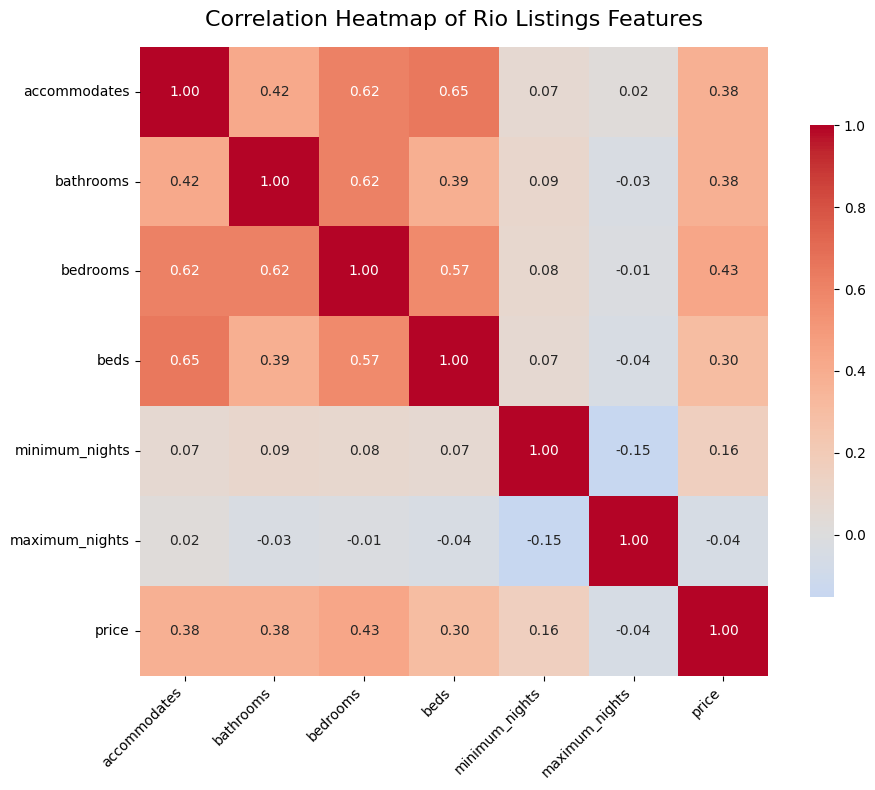

In [41]:
# Visualize correlation matrix

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot=True,          # show correlation values
    fmt=".2f",           # format with 2 decimals
    cmap="coolwarm",     # colormap: negative=blue, positive=red
    center=0,            # center color scale at 0
    square=True,         # square cells
    cbar_kws={"shrink": 0.75}  # adjust colorbar size
)

# Add a title to the heatmap
plt.title("Correlation Heatmap of Rio Listings Features", fontsize=16, pad=15)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()